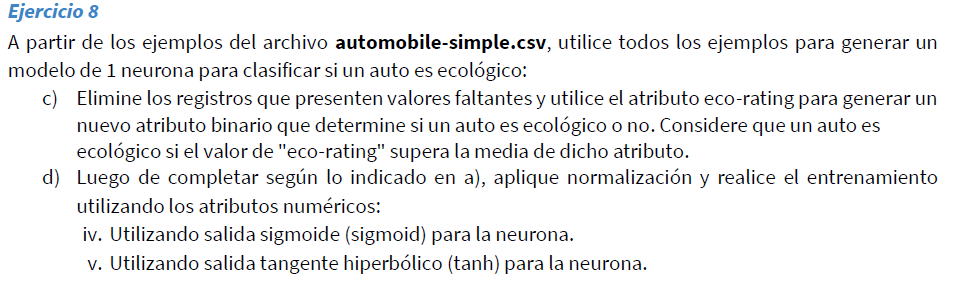

In [2]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [90]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


### **Veo cuantos datos faltan**

In [91]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

### **Elimino registros de datos faltantes**

In [92]:
df = df.dropna()
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

### **Creo atributo ecologico**

In [93]:
media_ecorating = df['eco-rating'].mean()
df['es-ecologico'] = df['eco-rating'].apply(lambda x: 1 if x > media_ecorating else 0)
display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,es-ecologico
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298,0
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335,0
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494,0
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342,0


### **Encodeo variables categoricas**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          197 non-null    object 
 1   fuel-type     197 non-null    object 
 2   num-of-doors  197 non-null    object 
 3   body-style    197 non-null    object 
 4   curb-weight   197 non-null    int64  
 5   engine-size   197 non-null    int64  
 6   horsepower    197 non-null    float64
 7   city-mpg      197 non-null    int64  
 8   highway-mpg   197 non-null    int64  
 9   price         197 non-null    float64
 10  volume        197 non-null    float64
 11  eco-rating    197 non-null    float64
 12  es-ecologico  197 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 21.5+ KB


In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df[['make', 'fuel-type', 'num-of-doors','body-style']] = df[['make', 'fuel-type', 'num-of-doors','body-style']].apply(lambda col: label_encoder.fit_transform(col))
df

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,es-ecologico
0,0,1,1,0,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,0,1,1,0,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,0,1,1,2,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,1,1,0,3,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,1,1,0,3,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,1,0,3,2952,141,114.0,23,28,16845.0,721961.760,38.354298,0
201,20,1,0,3,3049,141,160.0,19,25,19045.0,720913.920,32.043335,0
202,20,1,0,3,3012,173,134.0,18,23,21485.0,721961.760,29.806494,0
203,20,0,0,3,3217,145,106.0,26,27,22470.0,721961.760,35.073342,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          197 non-null    int32  
 1   fuel-type     197 non-null    int32  
 2   num-of-doors  197 non-null    int32  
 3   body-style    197 non-null    int32  
 4   curb-weight   197 non-null    int64  
 5   engine-size   197 non-null    int64  
 6   horsepower    197 non-null    float64
 7   city-mpg      197 non-null    int64  
 8   highway-mpg   197 non-null    int64  
 9   price         197 non-null    float64
 10  volume        197 non-null    float64
 11  eco-rating    197 non-null    float64
 12  es-ecologico  197 non-null    int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 18.5 KB


### **Divido en X e Y**

In [97]:
import numpy as np
from sklearn import preprocessing, model_selection

datos  = np.array(df)
Y = datos[:,12].reshape(-1,1) #variable que quiero predecir
X = np.delete(datos, [12], 1) #elimino la variable target

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X, Y, test_size=0.30, random_state=42)

### **Normalizo**

In [98]:
normalizador = preprocessing.StandardScaler()

X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

## **Modelo y entreno con salida sigmoide**

In [99]:
from ClassNeuronaGral import NeuronaGradiente
modelo_sigmoid = NeuronaGradiente(alpha=0.01, n_iter=100, FUN='sigmoid', COSTO='EC_binaria')

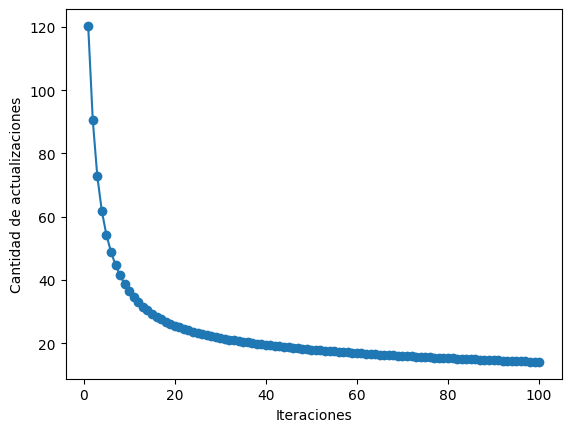

In [119]:
import matplotlib.pyplot as plt
modelo_sigmoid.fit(X_train,Y_train)
plt.plot(range(1, len(modelo_sigmoid.errors_) + 1), modelo_sigmoid.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [120]:
pred = modelo_sigmoid.predict(X_test)

# Aplanar Y_test para que sea 1D
aciertos = np.sum(pred == Y_test.flatten())
print("Aciertos =", aciertos)

# Calcular porcentaje de aciertos
porcentaje_aciertos = (100 * aciertos) / X_test.shape[0]
print("%% de aciertos = %.2f %%" % porcentaje_aciertos)


Aciertos = 59
% de aciertos = 98.33 %


### **Modelo y entrenamiento con salida hiperbolica**
**Debo modificar los datos porque la salida es -1 y 1**

In [145]:
# Seleccionar la columna objetivo (índice 12) y reestructurarla
Y = datos[:, 12].reshape(-1, 1)  # Variable que quiero predecir

# Convertir los valores de Y: 0 a -1 y 1 se mantiene
Y = np.where(Y == 0, -1, 1)

# Eliminar la columna objetivo de X
X = np.delete(datos, [12], axis=1)  # Elimino la variable target

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.30, random_state=42)

# Normalización de los datos
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


In [146]:
modelo_tanh = NeuronaGradiente(alpha=0.01, n_iter=100, FUN='tanh', COSTO='EC')

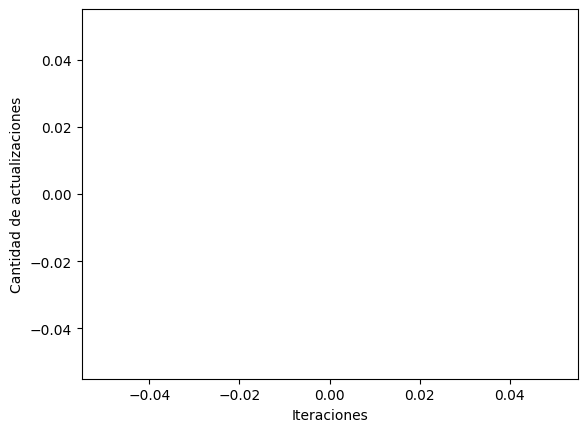

In [149]:
modelo_tanh.fit(X_train,Y_train)
plt.plot(range(1, len(modelo_tanh.errors_) + 1), modelo_tanh.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [150]:
pred = modelo_tanh.predict(X_test)

# Aplanar Y_test para que sea 1D
aciertos = np.sum(pred == Y_test.flatten())
print("Aciertos =", aciertos)

# Calcular porcentaje de aciertos
porcentaje_aciertos = (100 * aciertos) / X_test.shape[0]
print("%% de aciertos = %.2f %%" % porcentaje_aciertos)

Aciertos = 49
% de aciertos = 81.67 %


## *Es mejor sigmoid, mas preciso. Aparte en la neurona da error el EC con tanh ya que hay que calcular un logaritmo y las salidas son [-1,1]*

## **Cuestionario**

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [4]:
# imprime valores nulos
print(df.isnull().sum())

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64


In [5]:
mapeo = {
    'num-of-doors': {'two':2, 'four':4}
}

df.replace(mapeo, inplace=True)
display(df)

C:\Users\Peter\AppData\Local\Temp\ipykernel_34076\2066310777.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,2.0,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,2.0,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,2.0,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,4.0,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,4.0,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,4.0,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,4.0,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,4.0,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,4.0,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [7]:
import seaborn as sns
import numpy as np

#-- seleccionar los atributos numéricos --
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

# imprime valores nulos
print(df.isnull().sum())

nomAtrib = np.array(df.columns.values).reshape(-1,1)

#-- ver si tienen datos faltantes --
values = {'num-of-doors': df['num-of-doors'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)


# Imprime matriz de correclacion
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, square=True,  annot=True, linewidths=.5, cmap='coolwarm', annot_kws={'fontsize':9}, fmt='.2f')

num-of-doors    2
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64


KeyError: 'peak-rpm'